#**Tarea 2 Unidad 2**


## Programación Orientada a Objetos
### Finanzas Cuantitativas

**Profesor**: Dr. Julio Cesar Galindo Lopez

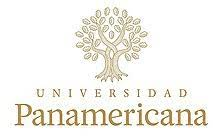


**Integrantes:**


Mariana Caraveo Enríquez

Regina Orozco Guadalajara

Antonio Ortiz Andrade

In [ ]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

## Pregunta 1

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
# Importamos el archivo de drive a google colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
d = pd.read_csv("/content/drive/MyDrive/Bases de Datos POO Sem 5/precios_muestra.ipynb")
d

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [ ]:
# Rendimientos simples
rendimientos = d.pct_change().dropna()
rendimientos

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [ ]:
# Sacamos la desviación estándar de los rendimientos
desv = rendimientos.std()*100
desv

BLUE      2.397742
ORANGE    7.960127
dtype: float64

In [ ]:
# Sacamos la media de los rendimientos
rendimientos.mean()*100

BLUE      0.999991
ORANGE    0.999986
dtype: float64

## Pregunta 2

In [ ]:
# Se componen los rendimientos
ranualizados = rendimientos + 1
ranualizados

,BLUE,ORANGE
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249
10,1.006151,0.831739


In [ ]:
# Aquí se anualizan los rendimientos
ranualizados.prod()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

## Pregunta 3

In [ ]:
# Capitalizar los rendimientos 1% mensual, 4% trimestral y 0.01% de rentabilidad diaria
mensual = ((1 + 0.001) ** 12)-1
mensual * 100

1.2066220495791535

In [ ]:
trimestral = ((1 + 0.004) ** 4)-1
trimestral*100

1.6096256256000085

In [ ]:
rentdiaria = ((1 + 0.0001) ** 252)-1
rentdiaria*100

2.5518911987694626

## Pregunta 4

In [ ]:
# Anualizar volatilidad
volat_an = desv * (1/12)
volat_an * 100

BLUE      19.981182
ORANGE    66.334390
dtype: float64

## Pregunta 5

In [ ]:
class Asset():
    def _init_(self, ticker, start_date, end_date):
      #el datetime es para que te ponga la fecha de hoy y strftime dice que partes de la fecha quiero
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date

    def get_data(self):
        df = yf.download(self.ticker, start = self.start_date, end = self.end_date)
        return df

    def  simple_returns(self, adj = False, cum = False):
        df = self.get_data()
        if adj:
            simple_returns = df["Adj Close"].pct_change().dropna()
        else:
            simple_returns = df["Close"].pct_change().dropna()
        if cum:
            simple_returns = (1 + simple_returns).cumprod() - 1
        return simple_returns

    def get_data_blue(self):
        d = pd.read_csv("/content/drive/MyDrive/Bases de Datos POO Sem 5/precios_muestra.ipynb")
        return d

    def simple_returns_blue(self):
        df_blue = self.get_data_blue().pct_change().dropna()+1
        annualized_return = df_blue.prod()
        return annualized_return

    def get_data_ab(self):
        df_ab = pd.DataFrame({"Stock A" : stock_a,
      "Stock B": stock_b})
        return df_ab

    def simple_returns_ayb(self):
        df_ayb = self.get_data_ab()
        rend = df_ayb.pct_change()+1
        mean = df_ayb.mean()
        dsv = df_ayb.std()
        dsv_anual = (dsv*(1/10))*100
        return print(rend), print(mean), print(dsv), print(dsv_anual)


In [ ]:
asset = Asset()
asset.simple_returns_blue()

BLUE      1.123310
ORANGE    1.087167
dtype: float64

# Pregunta 6

In [ ]:
# Creamos dataframe a partir de un diccionario con columnas "Stock A" y "Stock B"
valores = 10
media = 10
desvest = 2

import numpy as np
np.random.seed(1) # con esto ya no se mueven los datos
stock_a = np.random.normal(media, desvest, valores)
stock_b = np.random.normal(media, desvest, valores)

In [ ]:
df_ab = pd.DataFrame({"Stock A" : stock_a,
      "Stock B": stock_b})
df_ab

,Stock A,Stock B
0,13.248691,12.924216
1,8.776487,5.879719
2,8.943656,9.355166
3,7.854063,9.231891
4,11.730815,12.267539
5,5.396923,7.800217
6,13.489624,9.655144
7,8.477586,8.244283
8,10.638078,10.084427
9,9.501259,11.165630


# Pregunta 7

In [ ]:
asset = Asset()
asset.simple_returns_ayb()

    Stock A   Stock B
0       NaN       NaN
1  0.662442  0.454938
2  1.019047  1.591091
3  0.878171  0.986823
4  1.493598  1.328822
5  0.460064  0.635842
6  2.499503  1.237804
7  0.628452  0.853875
8  1.254848  1.223202
9  0.893137  1.107215
Stock A    9.805718
Stock B    9.660823
dtype: float64
Stock A    2.510635
Stock B    2.106372
dtype: float64
Stock A    25.106346
Stock B    21.063717
dtype: float64


(None, None, None, None)

# Pregunta 8

In [ ]:
# Crea dos activos artificiales que llamarás “AA” y “BB”, respectivamente. Supongamos que un cierto activo “AA” pierde 1% por mes durante 12 meses
# y un cierto activo “BB” gana 1% por mes para los 12 meses.
retAA = [-0.01] * 12
retBB = [0.01] * 12

# Calculamos desviación estándar
volAA = np.std(retAA)
volBB = np.std(retBB)

# Checamos qué activo es más volátil
if volAA > volBB:
    activovol = "AA"
elif volAA < volBB:
    activovol = "BB"
else:
    activovol = "Los dos activos son iguales de volatiles"

print(f"Volatilidad AA: {volAA}")
print(f"Volatilidad BB: {volBB}")
print(f"El activo más volátil es: {activovol}")

Volatilidad AA: 1.734723475976807e-18
Volatilidad BB: 1.734723475976807e-18
El activo más volátil es: Los dos activos son iguales de volatiles


# Pregunta 9

In [ ]:
tickers= (["AMZN", "KO", "MSFT"])
finicial = "2011-01-01"
ffinal = "2019-01-01"
amazon = yf.download("AMZN", finicial, ffinal)
ko = yf.download("KO", finicial, ffinal)
msft = yf.download("MSFT", finicial, ffinal)
datos = yf.download(tickers, finicial, ffinal)["Close"]
datos

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  3 of 3 completed


,AMZN,KO,MSFT
Date,,,
2011-01-03,9.211000,32.610001,27.980000
2011-01-04,9.250500,31.934999,28.090000
2011-01-05,9.371000,31.745001,28.000000
2011-01-06,9.293000,31.514999,28.820000
2011-01-07,9.274500,31.459999,28.600000
...,...,...,...
2018-12-24,67.197998,45.959999,94.129997
2018-12-26,73.544998,46.939999,100.559998
2018-12-27,73.082001,47.529999,101.180000


In [ ]:
# Calculamos los rendimientos simples de cada columna
rend = datos.pct_change().dropna()
rend

,AMZN,KO,MSFT
Date,,,
2011-01-04,0.004288,-0.020699,0.003931
2011-01-05,0.013026,-0.005950,-0.003204
2011-01-06,-0.008324,-0.007245,0.029286
2011-01-07,-0.001991,-0.001745,-0.007634
2011-01-10,-0.004367,0.002225,-0.013287
...,...,...,...
2018-12-24,-0.024313,-0.033845,-0.041739
2018-12-26,0.094452,0.021323,0.068310
2018-12-27,-0.006295,0.012569,0.006166


In [ ]:
# Calculamos desviación estándar
desvt = rend.std()*100
desvt

AMZN    1.992993
KO      0.910528
MSFT    1.460612
dtype: float64

In [ ]:
# Calculamos la media de la desviación estándar
mediadsvt = desvt.mean()*100
mediadsvt

145.47109568195725

In [ ]:
# Calculamos la volatilidad del portafolio
volt = mediadsvt ** (1/2011)
volt

1.0024794374116526

In [ ]:
# Anualizamos volatilidad
vol_ant = volt * (1/12)
vol_ant * 100

8.35399531176377

array([[<Axes: title={'center': 'AMZN'}>, <Axes: title={'center': 'KO'}>],
       [<Axes: title={'center': 'MSFT'}>, <Axes: >]], dtype=object)

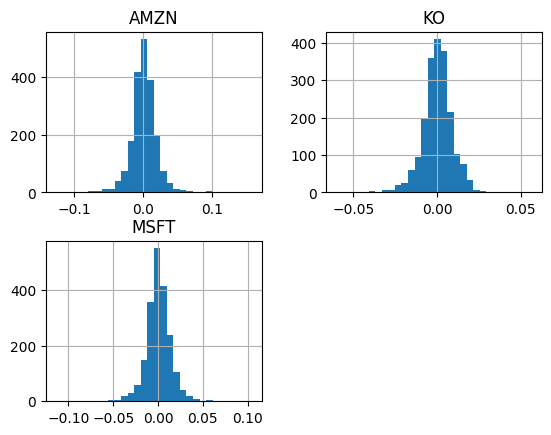

In [ ]:
# Realizamos un histograma de los rendimientos de cada ticker
rend.hist(bins=30)

In [ ]:
# Amazon tiene más rendimiento y KO es el que menos rendimiento tiene

# Pregunta 10

<Axes: xlabel='Date'>

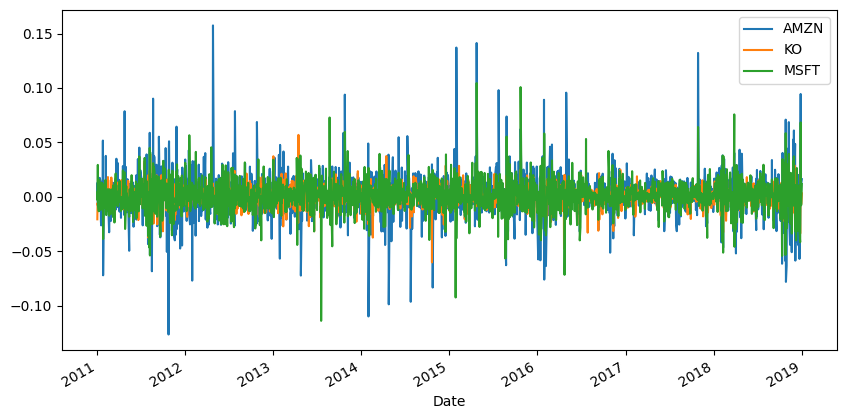

In [ ]:
# Bosquejamos la serie de tiempo para cada ticker del inciso anterior
rend.plot(label = "Close", figsize = (10,5))

In [ ]:
# Hay mayor fluctuación de rendimientos en Amazon y menor fluctuación de rendimientos en KO